# Unit 2 Build: T20I Cricket Match Results

In [583]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from statistics import mean
from sklearn.feature_selection import SelectKBest


In [584]:
url = 'https://drive.google.com/uc?export=download&id=1ulEQWFWdaNnJ2Lr9erwpMDR4mqa0jUdI'
df = pd.read_csv(url)
df

df.columns = df.columns.str.replace(" ","_")
df.rename(columns={"Innings_Date":"Match_Date"},inplace=True )
df

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,Innings_Economy_Rate
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LJ Wright,99*,99,83,1.0,1.0,55,8,6,180.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD Hales,99,99,84,1.0,0.0,68,6,4,145.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD Hales,94,94,80,1.0,0.0,61,11,2,154.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104617,Asghar Afghan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104618,Najibullah Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104619,Hazratullah Zazai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104620,Ibrahim Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [585]:
url1 = 'https://drive.google.com/uc?export=download&id=1yOWi4d1vV_FIFaXb_IcHLof-JLAun_vk'
df1 = pd.read_csv(url1)
df1.columns = df1.columns.str.replace(" ","_")
df1.drop(df1[df1['Result'] == 'N/R'].index, inplace = True)
df1.drop(df1[df1['Result'] == 'Tied'].index, inplace = True)
df1

,Result,Margin,Match,Home/Away,Ground,Match_Date,Match_Month,Match_Year,Match_Period,Matches,Country
0,Won,100 runs,England v Australia,Home,Southampton,2005/06/13,Jun,2005,Jun 2005,1,England
1,Lost,2 runs,England v Sri Lanka,Home,Southampton,2006/06/15,Jun,2006,Jun 2006,1,England
2,Lost,5 wickets,England v Pakistan,Home,Bristol,2006/08/28,Aug,2006,Aug 2006,1,England
3,Lost,77 runs,Australia v England,Away,Sydney,2007/01/09,Jan,2007,Jan 2007,1,England
4,Lost,15 runs,England v West Indies,Home,The Oval,2007/06/28,Jun,2007,Jun 2007,1,England
...,...,...,...,...,...,...,...,...,...,...,...
1641,Lost,30 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/14,Nov,2019,Nov 2019,1,Afghanistan
1642,Won,41 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/16,Nov,2019,Nov 2019,1,Afghanistan
1643,Won,29 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/17,Nov,2019,Nov 2019,1,Afghanistan
1644,Won,11 runs,Afghanistan v Ireland,Home,Greater Noida,2020/03/06,Mar,2020,Mar 2020,1,Afghanistan


In [586]:
dfbat = df[['Innings_Player','Innings_Runs_Scored','Innings_Runs_Scored_Num','Innings_Minutes_Batted','Innings_Batted_Flag',
              'Innings_Not_Out_Flag','Innings_Balls_Faced','Innings_Boundary_Fours',
              'Innings_Boundary_Sixes','Innings_Batting_Strike_Rate','Innings_Number','Opposition','Ground','Match_Date',
              'Country',"50's","100's",'Innings_Runs_Scored_Buckets']]
dfbat = dfbat.dropna()
dfbat.drop(dfbat[dfbat['Innings_Runs_Scored'] == 'DNB'].index, inplace = True)
dfbat.replace('-', 0, inplace=True)
dfbat

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,Innings_Number,Opposition,Ground,Match_Date,Country,50's,100's,Innings_Runs_Scored_Buckets
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,2,v Sri Lanka,Chattogram,2014/03/27,England,0.0,1.0,100-149
1,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,1,v New Zealand,Napier,2019/11/08,England,0.0,1.0,100-149
2,LJ Wright,99*,99,83,1.0,1.0,55,8,6,180.00,1,v Afghanistan,Colombo (RPS),2012/09/21,England,1.0,0.0,50-99
3,AD Hales,99,99,84,1.0,0.0,68,6,4,145.58,2,v West Indies,Nottingham,2012/06/24,England,1.0,0.0,50-99
4,AD Hales,94,94,80,1.0,0.0,61,11,2,154.09,1,v Australia,Chester-le-Street,2013/08/31,England,1.0,0.0,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101617,Asghar Afghan,0,0,0,1.0,0.0,1,0,0,0.00,1,v Zimbabwe,Chattogram,2019/09/20,Afghanistan,0.0,0.0,0-49
101618,Asghar Afghan,0,0,0,1.0,0.0,2,0,0,0.00,1,v Bangladesh,Chattogram,2019/09/21,Afghanistan,0.0,0.0,0-49
101619,Rahmanullah Gurbaz,0,0,0,1.0,0.0,1,0,0,0.00,2,v West Indies,Lucknow,2019/11/14,Afghanistan,0.0,0.0,0-49
101620,Hazratullah Zazai,0,0,0,1.0,0.0,4,0,0,0.00,1,v West Indies,Lucknow,2019/11/17,Afghanistan,0.0,0.0,0-49


In [587]:
dfbowl = df[['Innings_Player', 'Innings_Overs_Bowled','Innings_Bowled_Flag',	'Innings_Maidens_Bowled',	'Innings_Runs_Conceded',	'Innings_Wickets_Taken',
             '4_Wickets','5_Wickets','10_Wickets','Innings_Wickets_Taken_Buckets',	'Innings_Economy_Rate', 'Match_Date', 'Country', 'Ground']]
dfbowl = dfbowl.dropna()
dfbowl.drop(dfbowl[dfbowl['Innings_Overs_Bowled'] == 'DNB'].index, inplace = True)
dfbowl


,Innings_Player,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,Innings_Economy_Rate,Match_Date,Country,Ground
3994,CJ Jordan,2.0,1.0,0,6,4,1.0,0.0,0.0,0-4,3.00,2019/03/08,England,Basseterre
3995,DJ Willey,3.0,1.0,0,7,4,1.0,0.0,0.0,0-4,2.33,2019/03/10,England,Basseterre
3996,RS Bopara,3.4,1.0,0,10,4,1.0,0.0,0.0,0-4,2.72,2011/09/23,England,The Oval
3997,JL Denly,4.0,1.0,0,19,4,1.0,0.0,0.0,0-4,4.75,2018/10/27,England,Colombo (RPS)
3998,PD Collingwood,4.0,1.0,0,22,4,1.0,0.0,0.0,0-4,5.50,2006/06/15,England,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104218,Sayed Shirzad,4.0,1.0,0,42,0,1.0,0.0,0.0,0-4,10.50,2019/02/24,Afghanistan,Dehradun
104219,Mohammad Nabi,4.0,1.0,0,44,0,1.0,0.0,0.0,0-4,11.00,2016/12/16,Afghanistan,Dubai (DSC)
104220,Mohammad Nabi,4.0,1.0,0,46,0,1.0,0.0,0.0,0-4,11.50,2012/09/21,Afghanistan,Colombo (RPS)
104221,Mohammad Nabi,4.0,1.0,0,48,0,1.0,0.0,0.0,0-4,12.00,2017/03/08,Afghanistan,Greater Noida


In [588]:
df2 = df1.drop_duplicates(subset=['Match_Date', 'Country', 'Ground'])
dfbat_merge = pd.merge(dfbat,df2, on=['Match_Date', 'Country', 'Ground'], how='inner')
dfbat_merge

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,100's,Innings_Runs_Scored_Buckets,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,...,1.0,100-149,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
1,EJG Morgan,57,57,73,1.0,0.0,38,7,2,150.00,...,0.0,50-99,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
2,RS Bopara,11*,11,15,1.0,1.0,6,2,0,183.33,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
3,JC Buttler,2,2,3,1.0,0.0,3,0,0,66.66,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
4,MJ Lumb,0,0,2,1.0,0.0,5,0,0,0.00,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36584,Amir Hamza,6*,6,0,1.0,1.0,4,1,0,150.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
36585,Noor Ali Zadran,6,6,0,1.0,0.0,6,1,0,100.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
36586,Rashid Khan,2,2,0,1.0,0.0,4,0,0,50.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
36587,Shafiqullah,1,1,0,1.0,0.0,1,0,0,100.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1


In [589]:
dfbowl_merge = pd.merge(dfbowl,df2, on=['Match_Date', 'Country', 'Ground'], how='inner')
dfbowl_merge


,Innings_Player,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,...,Country,Ground,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches
0,CJ Jordan,2.0,1.0,0,6,4,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
1,LE Plunkett,2.5,1.0,0,8,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
2,AU Rashid,3.0,1.0,0,12,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
3,DJ Willey,3.0,1.0,0,18,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
4,TK Curran,1.0,1.0,0,1,0,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27013,Shapoor Zadran,3.0,1.0,0,28,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
27014,Mohammad Nabi,4.0,1.0,0,35,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
27015,Dawlat Zadran,3.0,1.0,0,46,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
27016,Samiullah Shinwari,3.0,1.0,0,22,0,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1


In [590]:
battrain = dfbat_merge[dfbat_merge.Match_Year.between(2014,2017)]
batval = dfbat_merge[dfbat_merge['Match_Year'] == 2018]
battest = dfbat_merge[dfbat_merge['Match_Year'] == 2019]
battrain.shape, batval.shape, battest.shape



((11214, 26), (3705, 26), (4917, 26))

In [591]:
battrain['Result'].value_counts(normalize=True)

Lost    0.548154
Won     0.451846
Name: Result, dtype: float64

In [592]:
target = 'Result'


battrain_features = battrain.drop(columns=[target])

numeric_features = battrain_features.select_dtypes(include='number').columns.tolist()

cardinality = battrain_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality.index.tolist()

features = numeric_features + categorical_features


print(features)

['Innings_Batted_Flag', 'Innings_Not_Out_Flag', "50's", "100's", 'Match_Year', 'Matches', 'Innings_Player', 'Innings_Runs_Scored', 'Innings_Runs_Scored_Num', 'Innings_Minutes_Batted', 'Innings_Balls_Faced', 'Innings_Boundary_Fours', 'Innings_Boundary_Sixes', 'Innings_Batting_Strike_Rate', 'Innings_Number', 'Opposition', 'Ground', 'Match_Date', 'Country', 'Innings_Runs_Scored_Buckets', 'Margin', 'Match', 'Home/Away', 'Match_Month', 'Match_Period']


In [593]:
X_train = battrain.drop(columns=target)
y_train = battrain[target]
X_val = batval.drop(columns=target)
y_val = batval[target]
X_test = battest.drop(columns=target)
y_test = battest[target]

In [594]:

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [595]:
%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    LogisticRegression()
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Test Accuracy', pipeline.score(X_test, y_test))


Validation Accuracy 0.5408906882591094
Test Accuracy 0.5100671140939598
Wall time: 315 ms


In [596]:
%%time
pipeline1 = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    LogisticRegression()
)


pipeline1.fit(X_train, y_train)
vn1 = pipeline1.score(X_val, y_val)
tn1 = pipeline1.score(X_test, y_test)
print('Validation Accuracy', vn1)
print('Test Accuracy', tn1)


Validation Accuracy 0.7101214574898785
Test Accuracy 0.5704697986577181
Wall time: 19.3 s


In [597]:
%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
vn = pipeline.score(X_val, y_val)
tn = pipeline.score(X_test, y_test)
print('Validation Accuracy', vn)
print('Test Accuracy', tn)


Validation Accuracy 0.6477732793522267
Test Accuracy 0.5735204392922514
Wall time: 926 ms


In [598]:
from sklearn import tree

In [599]:
%%time
pipeline2 = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    tree.DecisionTreeClassifier()
)


pipeline2.fit(X_train, y_train)
vn2 = pipeline2.score(X_val, y_val)
tn2 = pipeline2.score(X_test, y_test)
print('Validation Accuracy', vn2)
print('Test Accuracy', tn2)

Validation Accuracy 0.8688259109311741
Test Accuracy 0.7968273337400854
Wall time: 17.5 s


In [600]:
%%time
pipeline3 = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline3.fit(X_train, y_train)
vn3 = pipeline3.score(X_val, y_val)
tn3 = pipeline3.score(X_test, y_test)
print('Validation Accuracy', vn3)
print('Test Accuracy', tn3)

Validation Accuracy 0.8477732793522267
Test Accuracy 0.7657107992678462
Wall time: 20 s


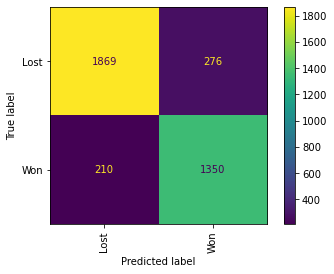

In [601]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline2, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

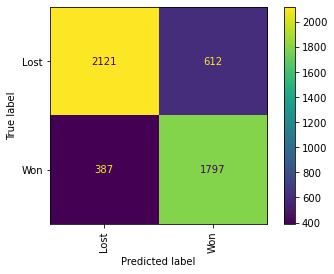

In [602]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline2, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

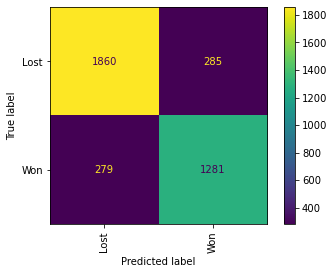

In [603]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline3, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

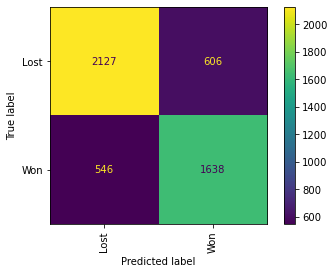

In [604]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline3, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [605]:
from sklearn.metrics import classification_report
y_predv2 = pipeline2.predict(X_val)
y_predt2 = pipeline2.predict(X_test)


In [606]:
print(classification_report(y_val, y_predv2))

              precision    recall  f1-score   support

        Lost       0.90      0.87      0.88      2145
         Won       0.83      0.87      0.85      1560

    accuracy                           0.87      3705
   macro avg       0.86      0.87      0.87      3705
weighted avg       0.87      0.87      0.87      3705



In [607]:
print(classification_report(y_test, y_predt2))

              precision    recall  f1-score   support

        Lost       0.85      0.78      0.81      2733
         Won       0.75      0.82      0.78      2184

    accuracy                           0.80      4917
   macro avg       0.80      0.80      0.80      4917
weighted avg       0.80      0.80      0.80      4917



In [608]:
y_predv3 = pipeline3.predict(X_val)
y_predt3 = pipeline3.predict(X_test)


In [609]:
print(classification_report(y_val, y_predv3))

              precision    recall  f1-score   support

        Lost       0.87      0.87      0.87      2145
         Won       0.82      0.82      0.82      1560

    accuracy                           0.85      3705
   macro avg       0.84      0.84      0.84      3705
weighted avg       0.85      0.85      0.85      3705



In [610]:
print(classification_report(y_test, y_predt3))

              precision    recall  f1-score   support

        Lost       0.80      0.78      0.79      2733
         Won       0.73      0.75      0.74      2184

    accuracy                           0.77      4917
   macro avg       0.76      0.76      0.76      4917
weighted avg       0.77      0.77      0.77      4917



In [611]:
y_predv1 = pipeline1.predict(X_val)
y_predt1 = pipeline1.predict(X_test)

In [612]:
batval1 = batval
batval1['Pred_Result'] = y_predv1
batval1

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,Innings_Runs_Scored_Buckets,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches,Pred_Result
195,EJG Morgan,80*,80,75,1.0,1.0,46,4,6,173.91,...,50-99,Won,2 runs,New Zealand v England,Away,Feb,2018,Feb 2018,1,Won
196,DJ Malan,53,53,41,1.0,0.0,36,2,5,147.22,...,50-99,Won,2 runs,New Zealand v England,Away,Feb,2018,Feb 2018,1,Won
197,JJ Roy,21,21,14,1.0,0.0,13,3,1,161.53,...,0-49,Won,2 runs,New Zealand v England,Away,Feb,2018,Feb 2018,1,Lost
198,DJ Willey,10,10,5,1.0,0.0,5,2,0,200.00,...,0-49,Won,2 runs,New Zealand v England,Away,Feb,2018,Feb 2018,1,Lost
199,LA Dawson,10,10,3,1.0,0.0,3,1,1,333.33,...,0-49,Won,2 runs,New Zealand v England,Away,Feb,2018,Feb 2018,1,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36275,Usman Ghani,19,19,0,1.0,0.0,26,1,1,73.07,...,0-49,Won,1 runs,Afghanistan v Bangladesh,Home,Jun,2018,Jun 2018,1,Won
36276,Najibullah Zadran,15,15,0,1.0,0.0,16,1,1,93.75,...,0-49,Won,1 runs,Afghanistan v Bangladesh,Home,Jun,2018,Jun 2018,1,Won
36277,Shafiqullah,4,4,0,1.0,0.0,5,0,0,80.00,...,0-49,Won,1 runs,Afghanistan v Bangladesh,Home,Jun,2018,Jun 2018,1,Won
36278,Mohammad Nabi,3,3,0,1.0,0.0,5,0,0,60.00,...,0-49,Won,1 runs,Afghanistan v Bangladesh,Home,Jun,2018,Jun 2018,1,Won


In [613]:
def to_bin(Data):
    for i in range(len(Data)):
        if(Data[i] == "Won"):
            Data[i] = 1
        else:
            Data[i] = 0
    return Data

In [614]:
from sklearn.metrics import roc_curve, roc_auc_score

In [615]:
battest1 = battest
battest1['Pred_Result'] = y_predt1
battest1

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,Innings_Runs_Scored_Buckets,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches,Pred_Result
18,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,...,100-149,Won,76 runs,New Zealand v England,Away,Nov,2019,Nov 2019,1,Won
19,EJG Morgan,91,91,59,1.0,0.0,41,7,7,221.95,...,50-99,Won,76 runs,New Zealand v England,Away,Nov,2019,Nov 2019,1,Won
20,T Banton,31,31,35,1.0,0.0,20,4,1,155.00,...,0-49,Won,76 runs,New Zealand v England,Away,Nov,2019,Nov 2019,1,Won
21,JM Bairstow,8,8,15,1.0,0.0,9,1,0,88.88,...,0-49,Won,76 runs,New Zealand v England,Away,Nov,2019,Nov 2019,1,Lost
22,SW Billings,0*,0,3,1.0,1.0,1,0,0,0.00,...,0-49,Won,76 runs,New Zealand v England,Away,Nov,2019,Nov 2019,1,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36422,Rahmanullah Gurbaz,15,15,0,1.0,0.0,12,2,0,125.00,...,0-49,Won,41 runs,Afghanistan v West Indies,Home,Nov,2019,Nov 2019,1,Lost
36423,Ibrahim Zadran,11,11,0,1.0,0.0,12,0,1,91.66,...,0-49,Won,41 runs,Afghanistan v West Indies,Home,Nov,2019,Nov 2019,1,Lost
36424,Asghar Afghan,8,8,0,1.0,0.0,14,0,0,57.14,...,0-49,Won,41 runs,Afghanistan v West Indies,Home,Nov,2019,Nov 2019,1,Lost
36425,Rashid Khan,5*,5,0,1.0,1.0,2,1,0,250.00,...,0-49,Won,41 runs,Afghanistan v West Indies,Home,Nov,2019,Nov 2019,1,Lost


In [616]:
y_predt

array(['Won', 'Won', 'Won', ..., 'Won', 'Lost', 'Won'], dtype=object)

In [617]:
yn = np.where(y_predt=='Won', 1, y_predt)
yn = np.where(yn=='Lost', 0, yn)
yn

array([1, 1, 1, ..., 1, 0, 1], dtype=object)

In [618]:
arlist = batval1['Country'].unique()
arlist1= battest1['Country'].unique()
arlist,arlist1

(array(['England', 'Australia', 'South Africa', 'West Indies',
        'New Zealand', 'India', 'Pakistan', 'Sri Lanka', 'Zimbabwe',
        'Netherlands', 'Bangladesh', 'Ireland', 'Scotland', 'Afghanistan'],
       dtype=object),
 array(['England', 'Australia', 'South Africa', 'West Indies',
        'New Zealand', 'India', 'Pakistan', 'Sri Lanka', 'Zimbabwe',
        'Bermuda', 'Netherlands', 'Bangladesh', 'Kenya', 'Namibia',
        'Ireland', 'Scotland', 'Afghanistan'], dtype=object))

In [619]:
def makeDF(df,arr):
    arrw = []
    arrl = []
    arrwp = []
    arrlp = []
    
    for s in arr:
        tempdf = df[df['Country'] == s]
        dateList = tempdf['Match_Date'].unique()
        
        nw = 0
        nwp = 0
        nl = 0
        nlp = 0
        n = 0
        for i in dateList:
            
            dateListdf = tempdf[tempdf['Match_Date'] == i]
            dateListdf1 = dateListdf[['Result','Match_Date']]
            dateListdf = dateListdf[['Pred_Result','Match_Date']]
            dateListdf = dateListdf.drop_duplicates()
            dateListdf1 = dateListdf1.drop_duplicates()
            nw = nw + len(dateListdf1[dateListdf1['Result'] == 'Won'])
            nl = nl + len(dateListdf1[dateListdf1['Result'] == 'Lost'])
            if dateListdf['Pred_Result'].iloc[0] == 'Won':
                nwp = nwp + 1
            else:
                nlp = nlp + 1
            #nwp = nwp + len(dateListdf[dateListdf['Pred_Result'] == 'Won'])
            #nlp = nlp + len(dateListdf[dateListdf['Pred_Result'] == 'Lost'])
            n = n + 1
            
        arrw.append(nw)
        arrl.append(nl)
        arrwp.append(nwp)
        arrlp.append(nlp)
        
    tempdf1 = {"Country" : arr, "Won" : arrw, "Pred_Won" : arrwp, "Lost" : arrl, "Pred_Lost" : arrlp}
    tempdf1 = pd.DataFrame(tempdf1)
    return tempdf1
        

            
            
            
            
        
        

In [620]:
appData1 = makeDF(batval1, arlist)
appData1

,Country,Won,Pred_Won,Lost,Pred_Lost
0,England,4,6,5,3
1,Australia,10,13,8,5
2,South Africa,4,5,3,2
3,West Indies,4,13,10,1
4,New Zealand,3,12,9,0
5,India,14,18,4,0
6,Pakistan,17,17,2,2
7,Sri Lanka,4,7,4,1
8,Zimbabwe,0,0,8,8
9,Netherlands,2,3,2,1


In [621]:
appData2 = makeDF(battest1, arlist1)
appData2

,Country,Won,Pred_Won,Lost,Pred_Lost
0,England,6,4,2,4
1,Australia,7,7,0,0
2,South Africa,5,4,2,3
3,West Indies,2,9,10,3
4,New Zealand,7,10,4,1
5,India,9,14,7,2
6,Pakistan,1,9,8,0
7,Sri Lanka,4,4,8,8
8,Zimbabwe,5,8,6,3
9,Bermuda,4,8,7,3


In [622]:
import seaborn as sns
from pdpbox import pdp

In [623]:
X = battrain[features]
y = battrain[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

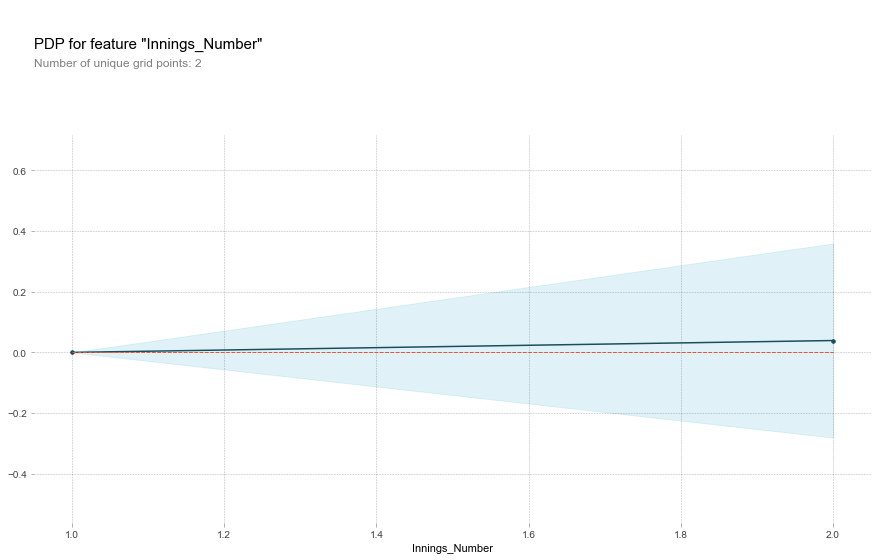

In [624]:
# Use Pdpbox
%matplotlib inline

feature = 'Innings_Number'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

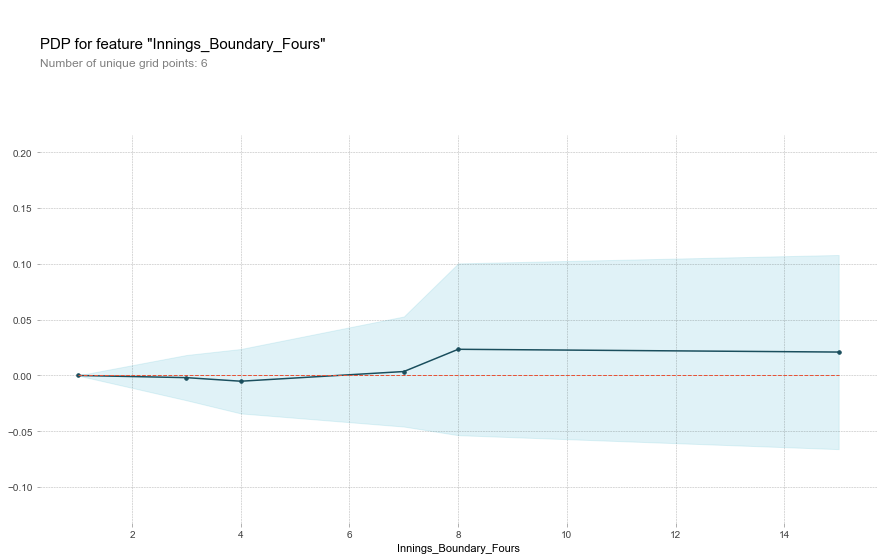

In [625]:
# Use Pdpbox
%matplotlib inline

feature = 'Innings_Boundary_Fours'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

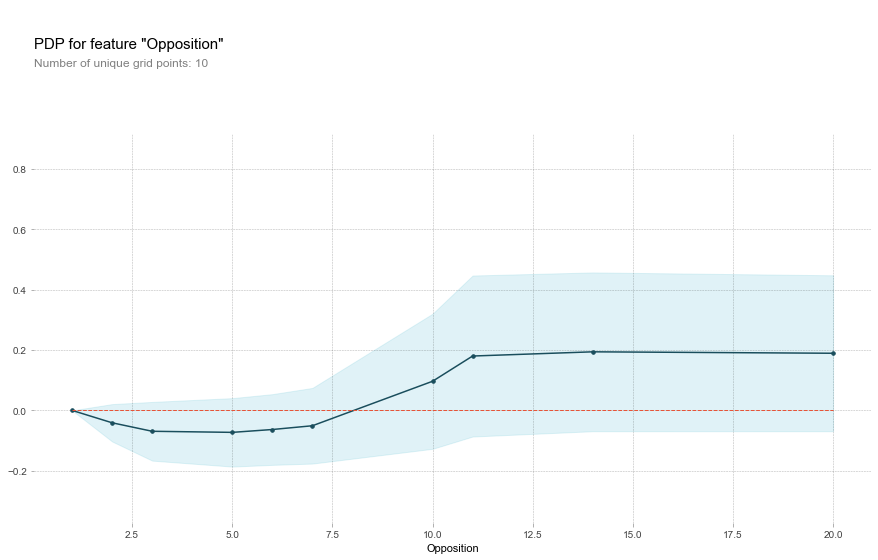

In [626]:
# Use Pdpbox
%matplotlib inline

feature = 'Opposition'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

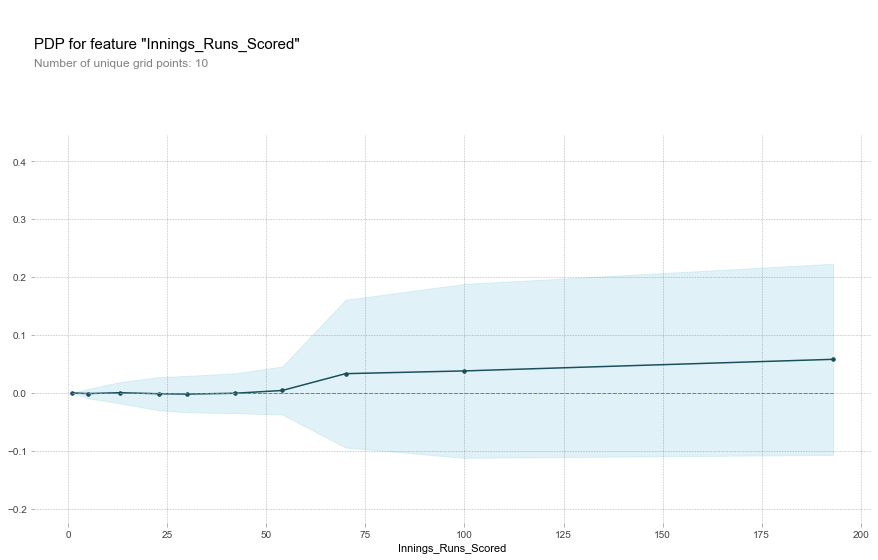

In [627]:
# Use Pdpbox
%matplotlib inline

feature = 'Innings_Runs_Scored'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

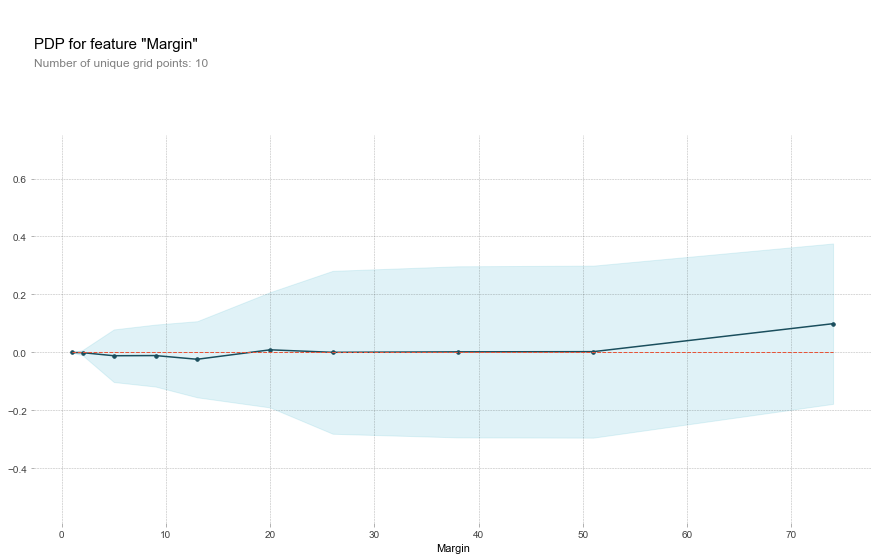

In [628]:
# Use Pdpbox
%matplotlib inline

feature = 'Margin'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

# Trying xgboost

In [629]:
from xgboost import XGBClassifier

pipeline4 = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

pipeline4.fit(X_train, y_train)
vn4 = pipeline4.score(X_val, y_val)
tn4 = pipeline4.score(X_test, y_test)
print('Validation Accuracy', vn4)
print('Test Accuracy', tn4)

Validation Accuracy 0.7497975708502024
Test Accuracy 0.6101281269066504


In [630]:

print('Logistic Regression:')
print('Validation Accuracy', vn1)
print('Test Accuracy', tn1)
print('XGBoost:')
print('Validation Accuracy', vn4)
print('Test Accuracy', tn4)
print('Decision Tree:')
print('Validation Accuracy', vn2)
print('Test Accuracy', tn2)
print('Random Forest:')
print('Validation Accuracy', vn3)
print('Test Accuracy', tn3)

Logistic Regression:
Validation Accuracy 0.7101214574898785
Test Accuracy 0.5704697986577181
XGBoost:
Validation Accuracy 0.7497975708502024
Test Accuracy 0.6101281269066504
Decision Tree:
Validation Accuracy 0.8688259109311741
Test Accuracy 0.7968273337400854
Random Forest:
Validation Accuracy 0.8477732793522267
Test Accuracy 0.7657107992678462


In [631]:
y_predv4 = pipeline4.predict(X_val)
y_predt4 = pipeline4.predict(X_test)

In [632]:
y_testb = y_test.replace({'Won': 1, 'Lost': 0})
y_testb.head()
y_test

18       Won
19       Won
20       Won
21       Won
22       Won
        ... 
36422    Won
36423    Won
36424    Won
36425    Won
36426    Won
Name: Result, Length: 4917, dtype: object

In [633]:
y_pred_prob_tree1 = pipeline1.predict_proba(X_test)[:, -1]
yn1 = np.where(y_pred_prob_tree1=='Won', 1, y_pred_prob_tree1)
yn1 = np.where(yn1=='Lost', 0, yn1)

fpr1, tpr1, thresholds1 = roc_curve(y_testb, yn1)
y_pred_prob_tree2 = pipeline2.predict_proba(X_test)[:, -1]
yn2 = np.where(y_pred_prob_tree2=='Won', 1, y_pred_prob_tree2)
yn2 = np.where(yn2=='Lost', 0, yn2)

fpr2, tpr2, thresholds2 = roc_curve(y_testb, yn2)
y_pred_prob_tree3 = pipeline3.predict_proba(X_test)[:, -1]
yn3 = np.where(y_pred_prob_tree3=='Won', 1, y_pred_prob_tree3)
yn3 = np.where(yn3=='Lost', 0, yn3)

fpr3, tpr3, thresholds3 = roc_curve(y_testb, yn3)
y_pred_prob_tree4 = pipeline4.predict_proba(X_test)[:, -1]
yn4 = np.where(y_pred_prob_tree4=='Won', 1, y_pred_prob_tree4)
yn4 = np.where(yn4=='Lost', 0, yn4)

fpr4, tpr4, thresholds4 = roc_curve(y_testb, yn4)

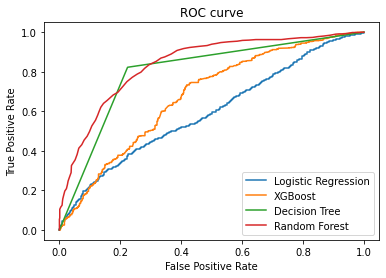

In [634]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr4, tpr4, label='XGBoost')
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.plot(fpr3, tpr3, label='Random Forest')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [635]:
print('ROC AOC SCORES:')
print('Logistic', roc_auc_score(y_testb, yn1))
print('XGBoost', roc_auc_score(y_testb, yn4))
print('Tree', roc_auc_score(y_testb, yn2))
print('Forest', roc_auc_score(y_testb, yn3))

ROC AOC SCORES:
Logistic 0.5937518847782295
XGBoost 0.676821600463203
Tree 0.7994362251360055
Forest 0.8396490995283531


# Get feature importances and Plot feature importances

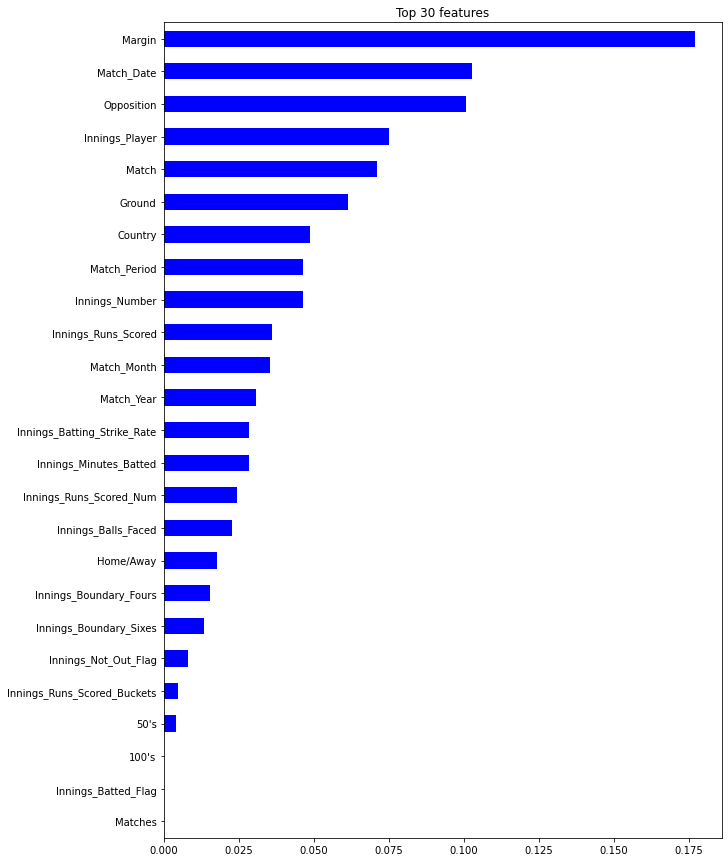

In [636]:
# Get feature importances
n1 = len(X_train.columns)
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_[0:n1], X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [637]:
import eli5
from eli5.sklearn import PermutationImportance

# Ignore warnings

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)



feature_names = X_val.columns.tolist()

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0490 ± 0.0074,Innings_Number
0.0356 ± 0.0046,Margin
0.0309 ± 0.0087,Opposition
0.0010 ± 0.0069,Ground
0 ± 0.0000,100's
0 ± 0.0000,Innings_Batted_Flag
0 ± 0.0000,Match_Period
0 ± 0.0000,Match_Date
0 ± 0.0000,Matches
0 ± 0.0000,Match_Year


# Trying again dropping some of the less important columns

In [638]:
column = ["50's", "100's", 'Match_Year', 'Ground', 'Home/Away', 
          'Country', 'Innings_Number', 'Match_Period', 'Margin']
features = [x for x in features if x not in column]


In [639]:
print(features)

['Innings_Batted_Flag', 'Innings_Not_Out_Flag', 'Matches', 'Innings_Player', 'Innings_Runs_Scored', 'Innings_Runs_Scored_Num', 'Innings_Minutes_Batted', 'Innings_Balls_Faced', 'Innings_Boundary_Fours', 'Innings_Boundary_Sixes', 'Innings_Batting_Strike_Rate', 'Opposition', 'Match_Date', 'Innings_Runs_Scored_Buckets', 'Match', 'Match_Month']


In [640]:
X_train_ = battrain[features]
y_train_ = battrain[target]
X_val_ = batval[features]
y_val_ = batval[target]
X_test_ = battest[features]
y_test_ = battest[target]

In [641]:
%%time
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train_, y_train_)
print('Validation Accuracy', pipeline.score(X_val_, y_val_))
print('Test Accuracy', pipeline.score(X_test_, y_test_))

Validation Accuracy 0.697165991902834
Test Accuracy 0.5680292861500915
Wall time: 15.2 s


In [642]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

pipeline.fit(X_train_, y_train_)
print('Validation Accuracy', pipeline.score(X_val_, y_val_))
print('Test Accuracy', pipeline.score(X_test_, y_test_))

Validation Accuracy 0.7101214574898785
Test Accuracy 0.5649786455155583
